### Wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations.

## Step 1: Gathering Data

**The WeRateDogs Twitter Archive**: This file was downloaded manually from the project workspace and will be loaded directly into the project workspace

In [1]:
# import the necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# import library for manipulating files locally and in the internet
import re
import os
import json
import pprint
import requests

# import BeautifulSoup for manipulating html
from bs4 import BeautifulSoup

Load the "twitter-archive-enhanced.csv" file into a DataFrame

In [2]:
# Load the file into a DataFrame
filename = "twitter-archive-enhanced.csv"
twitter_enhanced = pd.read_csv(filename)

twitter_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


**The tweet image predictions**: This file is hosted on udacity servers hence will be downloaded programmatically using the Requests library with the link *"https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"*

Download and save the file from Udacity Servers

In [3]:
# Download the file from udacity servers
file_url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(file_url)

# Save the file locally
with open(file_url.split('/')[-1], mode='wb') as image_predictions_file:
    image_predictions_file.write(response.content)

Load the file into a pandas DataFrame

In [4]:
image_predictions = pd.read_csv(file_url.split('/')[-1], sep='\t')
image_predictions.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


**Additional data from Twitter API**: I am to gather each tweet's retweet count and favorite ("like") count at the minimum and any additional data I find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file.

I was unable to register for a developer account because twitter cannot send a text message to my phone number

![Alt text](error%201.png)

![Alt text](error%202.png)

So I used the "tweet_json.txt" file that was provided as an alternative in the project workspace as opposed to querying the tweet myself.

In [5]:
# Print the content on the first line of this file
with open("tweet_json.txt", 'r') as tweet_file:
    print(tweet_file.readline())

{"created_at": "Tue Aug 01 16:23:56 +0000 2017", "id": 892420643555336193, "id_str": "892420643555336193", "full_text": "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", "truncated": false, "display_text_range": [0, 85], "entities": {"hashtags": [], "symbols": [], "user_mentions": [], "urls": [], "media": [{"id": 892420639486877696, "id_str": "892420639486877696", "indices": [86, 109], "media_url": "http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg", "media_url_https": "https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg", "url": "https://t.co/MgUWQ76dJU", "display_url": "pic.twitter.com/MgUWQ76dJU", "expanded_url": "https://twitter.com/dog_rates/status/892420643555336193/photo/1", "type": "photo", "sizes": {"large": {"w": 540, "h": 528, "resize": "fit"}, "thumb": {"w": 150, "h": 150, "resize": "crop"}, "small": {"w": 540, "h": 528, "resize": "fit"}, "medium": {"w": 540, "h": 528, "resize": "fit"}}}]}, "extended_entities": {"media

The first line is in Json. Good! But I don't like this format as it's hard to read and understand. So I'll pretty print so I can better discern the Json Objects and Arrays.

In [6]:
# Pretty print the first line of the file
with open("tweet_json.txt", 'r') as tweet_file:
    # Get the data on the first line
    first_line = tweet_file.readline()
    # Convert the string content of the first line to dictionary
    first_line_obj = json.loads(first_line)
    # Convert the dictionary back into JSON string with the proper indentation
    formatted_str = json.dumps(first_line_obj, indent=4)
    # Now print the formatted string to the console
    print(formatted_str)

{
    "created_at": "Tue Aug 01 16:23:56 +0000 2017",
    "id": 892420643555336193,
    "id_str": "892420643555336193",
    "full_text": "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
    "truncated": false,
    "display_text_range": [
        0,
        85
    ],
    "entities": {
        "hashtags": [],
        "symbols": [],
        "user_mentions": [],
        "urls": [],
        "media": [
            {
                "id": 892420639486877696,
                "id_str": "892420639486877696",
                "indices": [
                    86,
                    109
                ],
                "media_url": "http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg",
                "media_url_https": "https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg",
                "url": "https://t.co/MgUWQ76dJU",
                "display_url": "pic.twitter.com/MgUWQ76dJU",
                "expanded_url": "https://twitter.com/dog_rat

Perfect! Now I can see the level that each data is in. I'll be extracting the required data: _id, retweet_count and favorite_count_

In [7]:
# Create an empty list to hold the list of data in dictionary format
tweet_data_list = []

# Open the tweet_json.txt in read mode
with open('tweet_json.txt', 'r') as tweet_file:
    # Create a loop to cycle through all the lines in the file
    for line in tweet_file.readlines():
        # Convert each line into a dictionary
        tweet_line = json.loads(line)
        # Now get the individual data required from each line
        tweet_id = tweet_line['id']
        retweet_count = tweet_line['retweet_count']
        favorite_count = tweet_line['favorite_count']
        
         # Appending each to the list
        tweet_data_list.append({
                "tweet_id" : tweet_id,
                "retweet_count" : retweet_count,
                "favorite_count" : favorite_count})

# Convert the list of dictionaries into a Pandas DataFrame using 'pd.DataFrame()'
tweet_data = pd.DataFrame(tweet_data_list)
# Confirm that we have the required data in the format we want it
tweet_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data

### Assessing Twitter Archive Dataset (twitter-enhanced)

The column descriptions are as follows:
- tweet_id - unique id for each tweet by the twitter account.
- in_reply_to_status_id - This field will contain the integer representation of the original tweet’s id if the represented tweet is a reply.
- in_reply_to_user_id - This field will contain the integer representation of the original tweet’s author id if the represented tweet is a reply.
- timestamp - The time the tweet was tweeted.
- source - The source of the tweet.
- text - This is the content of the tweet.
- retweeted_status_id - This attribute contains a representation of the original tweet that was retweeted.
- retweeted_status_user_id - The id of the retweeted status user.
- retweeted_status_timestamp - This attribute contains a representation of the time the original tweet was retweeted.
- expanded_urls	- This url of each tweet.
- rating_numerator - This numerator of the ratings for the dog.
- rating_denominator - This denominator of the ratings for the dog.
- name - This name of the dog.
- doggo - One of the dog stages.
- floofer - One of the dog stages.
- pupper - One of the dog stages.
- puppo - One of the dog stages.

### **Visual Assessment**

I will display the dataframe to assess visually by scrolling

In [8]:
# Display the dataframe
twitter_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


#### **Programmatic Assessment**

I am now using different pandas method to assess the dataframe programmatically

How many rows and columns do we have in the dataset?

In [9]:
# Create a helper method check and print to th console
def print_shape(dataframe):
    shape = dataframe.shape

    print("This dataset contains {} rows and {} columns.".format(shape[0], shape[1]))

# Print the rows and columns to the console
print_shape(twitter_enhanced)

This dataset contains 2356 rows and 17 columns.


What values do we have at the top our dataset?

In [10]:
# Display the first 10 records
twitter_enhanced.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


What values do we have at the end of our dataset?

In [11]:
# Display the last 10 records
twitter_enhanced.tail(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600...,8,10,the,None,None,None,None
2347,666057090499244032,NaN,NaN,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090...,9,10,a,None,None,None,None
2348,666055525042405380,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525...,10,10,a,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


Let's pull 10 records at random three times and see what will show up.

In [12]:
# Display 10 records at random
twitter_enhanced.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1491,692894228850999298,NaN,NaN,2016-01-29 02:17:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Tupawc. He's actually a Christian rapper....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/692894228...,10,10,Tupawc,None,None,None,None
666,790581949425475584,NaN,NaN,2016-10-24 15:53:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Duke. He sneaks into the fridge someti...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/790581949...,11,10,Duke,None,None,None,None
1490,692901601640583168,NaN,NaN,2016-01-29 02:46:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Fuck the system"" 10/10 https://t.co/N0OADmCnVV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/692901601...,10,10,None,None,None,None,None
1249,711306686208872448,NaN,NaN,2016-03-19 21:41:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",What hooligan sent in pictures w/out a dog in ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/711306686...,3,10,None,None,None,None,None
306,836001077879255040,NaN,NaN,2017-02-26 23:52:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Atlas is back and this time he's prettier than...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/836001077...,13,10,None,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
1551,689143371370250240,NaN,NaN,2016-01-18 17:52:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Trip. He likes wearing costumes that aren...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689143371...,10,10,Trip,None,None,pupper,None
2025,671882082306625538,NaN,NaN,2015-12-02 02:42:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Batdog. He's sleeping now but when he ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671882082...,11,10,Batdog,None,None,None,None
194,855245323840757760,NaN,NaN,2017-04-21 02:22:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet George. He looks slightly ...,8.421635e+17,4.196984e+09,2017-03-16 00:00:07 +0000,https://twitter.com/dog_rates/status/842163532...,12,10,George,None,None,None,None
238,847116187444137987,NaN,NaN,2017-03-29 16:00:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Unbelievable... We. Only. Rate. Dogs. Please s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/847116187...,11,10,None,None,None,None,None


In [13]:
# Display 10 records at random again
twitter_enhanced.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2184,668988183816871936,NaN,NaN,2015-11-24 03:03:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Honor to rate this dog. Lots of fur on him. Tw...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668988183...,7,10,None,None,None,None,None
15,889278841981685760,NaN,NaN,2017-07-24 00:19:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oliver. You're witnessing one of his m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889278841...,13,10,Oliver,None,None,None,None
1622,684914660081053696,NaN,NaN,2016-01-07 01:49:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Hello yes I'll just get one of each color tha...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684914660...,12,10,None,None,None,None,None
2185,668986018524233728,NaN,NaN,2015-11-24 02:54:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ruby. She's a Bimmington Fettuccini. O...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668986018...,9,10,Ruby,None,None,None,None
724,782747134529531904,NaN,NaN,2016-10-03 01:00:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Deacon. He's the happiest almost dry d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/782747134...,11,10,Deacon,doggo,None,None,None
2153,669661792646373376,NaN,NaN,2015-11-25 23:39:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a brave dog. Excellent free climber. T...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669661792...,5,10,a,None,None,None,None
2231,668226093875376128,NaN,NaN,2015-11-22 00:34:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Sneaky dog here. Tuba player has no clue. 10/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668226093...,10,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
2033,671744970634719232,NaN,NaN,2015-12-01 17:37:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Very fit horned dog here. Looks powerful. Not ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671744970...,6,10,None,None,None,None,None
1885,674793399141146624,6.717299e+17,4.196984e+09,2015-12-10 03:30:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have found another. 13/10 https://t.co/HwroP...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674793399...,13,10,None,None,None,None,None


In [14]:
# Display 10 records at random again
twitter_enhanced.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1640,684147889187209216,NaN,NaN,2016-01-04 23:02:22 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Sweets the English Bulldog. Waves back...,NaN,NaN,NaN,https://vine.co/v/ib2nTOEuuOI,12,10,Sweets,None,None,pupper,None
1673,682303737705140231,NaN,NaN,2015-12-30 20:54:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Todo. He's screaming because he doesn'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682303737...,9,10,Todo,None,None,None,None
2076,670838202509447168,NaN,NaN,2015-11-29 05:34:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Pink dogs here. Unreasonably long necks. Left ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670838202...,4,10,None,None,None,None,None
1548,689275259254616065,NaN,NaN,2016-01-19 02:36:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Lucky. He was showing his friends an extr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689275259...,10,10,Lucky,None,None,None,None
1605,685681090388975616,6.855479e+17,4.196984e+09,2016-01-09 04:34:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Jack deserves another round of applause. If yo...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
2025,671882082306625538,NaN,NaN,2015-12-02 02:42:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Batdog. He's sleeping now but when he ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671882082...,11,10,Batdog,None,None,None,None
1698,681193455364796417,NaN,NaN,2015-12-27 19:22:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Aspen. He's astronomically fluffy. I w...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681193455...,11,10,Aspen,None,None,None,None
770,776819012571455488,NaN,NaN,2016-09-16 16:24:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Everybody look at this beautifu...,6.798284e+17,4.196984e+09,2015-12-24 00:58:27 +0000,https://twitter.com/dog_rates/status/679828447...,13,10,None,None,None,pupper,None
190,855857698524602368,NaN,NaN,2017-04-22 18:55:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...","HE'S LIKE ""WAIT A MINUTE I'M AN ANIMAL THIS IS...",NaN,NaN,NaN,https://twitter.com/perfy/status/8558573181681...,13,10,None,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


Let's inspect the information of the dataset

In [15]:
# Display a concise summary of the dataset
twitter_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [16]:
# Display a summary statistics of the dataset
twitter_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


Let's check for duplicated records in the dataset.

In [17]:
# Check for duplicates
twitter_enhanced.duplicated().sum()

0

Let's check for nulls or missing records

In [18]:
# Check for nulls
twitter_enhanced.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

**Column Assessment**

- Numerator Column

In [19]:
# Print the unique values in this column with the number of times each show up
twitter_enhanced.rating_numerator.value_counts().sort_index(ascending=True)

0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

Some values are higher than 10. This is not a problem for this project.

- Denominator Column

In [20]:
# Print the unique records in this column
twitter_enhanced.rating_denominator.value_counts().sort_index(ascending=True)

0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

The denominator column values should all be 10. Any number above or below 10 is inappropriate. How many records contain these?

In [21]:
# Count the number of records that have inappropriate denominator
print('There are {} records with inappropriate denominator value.'.format(len(twitter_enhanced[twitter_enhanced.rating_denominator != 10])))

There are 23 records with inappropriate denominator value.


- Name Column

In [22]:
# Get the unique names in the dataset and their counts
twitter_enhanced.name.value_counts().sort_index(ascending=True)

Abby            2
Ace             1
Acro            1
Adele           1
Aiden           1
               ..
such            1
the             8
this            1
unacceptable    1
very            5
Name: name, Length: 957, dtype: int64

I see names that seems invalid; the likes of _such, the, this, unacceptable & very_. These are words and not animal names. So I'll further inspect for such scenarios.

In [23]:
# Get the list of names that start with lowercase letters
lowercase_names = twitter_enhanced.name.str.contains('^[a-z]', regex=True)

# The display these names and their frequency of occurrence
twitter_enhanced[lowercase_names].name.value_counts().sort_index(ascending=True)

a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: name, dtype: int64

All the names that start with lowercase letters are words and not animal names. How many of these records do we have?

In [24]:
# Print the number of records that have words as their animal name
print('There are {} records with words as animal name in the dataset'.format(len(twitter_enhanced[lowercase_names].name)))

There are 109 records with words as animal name in the dataset


- Source Column

In [25]:
# Check the unique values in this column
twitter_enhanced.source.value_counts().sort_index(ascending=True)

<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

This column is all about the device used to make the tweet.

- Text Column

This column will contain the actual text of each tweet so each value will be unique. Let's carry on and check.

In [26]:
# Check the unique values in the text column
twitter_enhanced.text.value_counts().sort_index(ascending=True)

"AND IIIIIIIIIIIEIIIIIIIIIIIII WILL ALWAYS LOVE YOUUUUU" 11/10 https://t.co/rSNCEiTtfI                                              1
"AT DAWN, WE RIDE"\n10/10 for both dogs https://t.co/3aXX6wH6it                                                                     1
"Can you behave? You're ruining my wedding day"\nDOG: idgaf this flashlight tastes good as hell\n\n10/10 https://t.co/GlFZPzqcEU    1
"Challenge accepted"\n10/10 https://t.co/vNjvr5Bl9u                                                                                 1
"Challenge completed" \n(pupgraded to 12/10) https://t.co/85dTK7XCXB                                                                1
                                                                                                                                   ..
holy shit 12/10 https://t.co/p6O8X93bTQ                                                                                             1
oh h*ck 10/10 https://t.co/bC69RrW559                         

The length seen above is 2356 which is the number of records in the datafram. Meaning each of the text value is unique to the tweet.

- Columns Inspection

Check if the column names are in lowercase

In [27]:
# Print the column names to the console
twitter_enhanced.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

All are in lowercase. Good!

### Assessing Image Predictions Data (image_predictions)

The column descriptions are as follows:
- tweet_id - unique id for each tweet by the twitter account.
- jpg_url - url for the dog image.
- img_num - image number ranging from 1 to 4.
- p1 - the algorithm's #1 prediction for the image in the tweet .
- p1_conf - how confident the algorithm is in its #1 prediction.
- p1_dog- whether or not the #1 prediction is a breed of dog.
- p2 - the algorithm's #2 prediction for the image in the tweet.
- p2_conf - how confident the algorithm is in its #2 prediction.
- p2_dog - whether or not the #2 prediction is a breed of dog.
- p3 - the algorithm's #3 prediction for the image in the tweet.
- p3_conf - how confident the algorithm is in its #3 prediction.
- p3_dog - whether or not the #3 prediction is a breed of dog

#### **Visual Assessmwnt**

I will display the dataframe to assess visually by scrolling

In [28]:
# Display the dataframe
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


#### **Programmatic Assessmnt**

I am now using different pandas methods to assess the dataframe programmatically

How many rows and columns are in this dataset?

In [29]:
# Print the number of rows and columns present in the dataset
print_shape(image_predictions)

This dataset contains 2075 rows and 12 columns.


What values do we have at the top of our dataset?

In [30]:
# Display the first 10 records
image_predictions.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


What do we have at the end of our dataset?

In [31]:
# Display the last 10 records
image_predictions.tail(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2065,890240255349198849,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
2066,890609185150312448,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
2067,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


Let's pull 10 records at random three times and see what will show up.

In [32]:
# Display 10 records at random
image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1977,870374049280663552,https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg,1,golden_retriever,0.841001,True,Great_Pyrenees,0.099278,True,Labrador_retriever,0.032621,True
387,673352124999274496,https://pbs.twimg.com/media/CVg6L2hWIAAYuEb.jpg,1,golden_retriever,0.672808,True,Labrador_retriever,0.275885,True,kuvasz,0.022255,True
696,684481074559381504,https://pbs.twimg.com/media/CX_D6AJWwAAnBIw.jpg,1,Chihuahua,0.937810,True,Pomeranian,0.020307,True,polecat,0.017357,False
330,672095186491711488,https://pbs.twimg.com/media/CVPDAR9XIAAm8QB.jpg,1,pug,0.794087,True,French_bulldog,0.140796,True,bull_mastiff,0.044681,True
1462,778383385161035776,https://pbs.twimg.com/media/Cs1fjyqWIAE2jop.jpg,1,collie,0.345266,True,borzoi,0.312823,True,Border_collie,0.213011,True
591,679158373988876288,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1751,824297048279236611,https://pbs.twimg.com/media/C3B9ypNWEAM1bVs.jpg,2,teddy,0.588230,False,jigsaw_puzzle,0.028910,False,doormat,0.022251,False
969,706516534877929472,https://pbs.twimg.com/media/Cc4NCQiXEAEx2eJ.jpg,1,golden_retriever,0.772685,True,Labrador_retriever,0.071665,True,golfcart,0.020993,False
1738,822244816520155136,https://pbs.twimg.com/media/C2kzTGxWEAEOpPL.jpg,1,Samoyed,0.585441,True,Pomeranian,0.193654,True,Arctic_fox,0.071648,False
1150,732005617171337216,https://pbs.twimg.com/media/CiibOMzUYAA9Mxz.jpg,1,English_setter,0.677408,True,Border_collie,0.052724,True,cocker_spaniel,0.048572,True


In [33]:
# Display 10 records at random again
image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1694,816091915477250048,https://pbs.twimg.com/media/C1NXQ6NXUAEAxIQ.jpg,3,Pomeranian,0.967345,True,Samoyed,0.007397,True,papillon,0.006017,True
1469,779056095788752897,https://pbs.twimg.com/media/Cs_DYr1XEAA54Pu.jpg,1,Chihuahua,0.721188,True,toy_terrier,0.112943,True,kelpie,0.053364,True
1989,872967104147763200,https://pbs.twimg.com/media/DB1m871XUAAw5vZ.jpg,2,Labrador_retriever,0.476913,True,Chesapeake_Bay_retriever,0.174145,True,German_short-haired_pointer,0.092861,True
1094,719991154352222208,https://pbs.twimg.com/media/Cf3sH62VAAA-LiP.jpg,2,golden_retriever,0.605304,True,cocker_spaniel,0.130948,True,Labrador_retriever,0.094692,True
1935,859924526012018688,https://pbs.twimg.com/media/C-8QypZXcAAekaF.jpg,1,French_bulldog,0.254587,True,Staffordshire_bullterrier,0.192558,True,hog,0.100270,False
511,676191832485810177,https://pbs.twimg.com/media/CWJQ4UmWoAIJ29t.jpg,2,Chihuahua,0.376741,True,Italian_greyhound,0.173114,True,muzzle,0.071485,False
1017,709918798883774466,https://pbs.twimg.com/media/CdojYQmW8AApv4h.jpg,2,Pembroke,0.956222,True,Cardigan,0.020727,True,Chihuahua,0.007912,True
1796,831322785565769729,https://pbs.twimg.com/media/C4lzqQ4UEAApzU0.jpg,1,Old_English_sheepdog,0.999715,True,Tibetan_terrier,0.000046,True,guinea_pig,0.000041,False
660,682406705142087680,https://pbs.twimg.com/media/CXhlRmRUMAIYoFO.jpg,1,wombat,0.709344,False,koala,0.169758,False,beaver,0.079433,False
809,692158366030913536,https://pbs.twimg.com/media/CZsKVxfWQAAXy2u.jpg,1,pug,0.956565,True,swing,0.018907,False,toy_poodle,0.013544,True


In [34]:
# Display 10 records at random for the last time
image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1344,759099523532779520,https://pbs.twimg.com/media/Cojc_Q0WcAAqi_K.jpg,1,Shetland_sheepdog,0.129034,True,kelpie,0.117508,True,Siberian_husky,0.106708,True
1983,871879754684805121,https://pbs.twimg.com/media/DBmKAmBXUAE-pQ-.jpg,1,Shetland_sheepdog,0.969171,True,collie,0.018261,True,Pomeranian,0.008515,True
2047,886736880519319552,https://pbs.twimg.com/media/DE5Se8FXcAAJFx4.jpg,1,kuvasz,0.309706,True,Great_Pyrenees,0.186136,True,Dandie_Dinmont,0.086346,True
76,667435689202614272,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,1,Rottweiler,0.999091,True,miniature_pinscher,0.000450,True,black-and-tan_coonhound,0.000157,True
1698,816816676327063552,https://pbs.twimg.com/media/C1XqbhXXUAElpfI.jpg,1,malamute,0.668164,True,Pembroke,0.105033,True,Siberian_husky,0.077875,True
259,670782429121134593,https://pbs.twimg.com/media/CU8ZDu9WwAADg3N.jpg,1,Chihuahua,0.952963,True,French_bulldog,0.036575,True,Boston_bull,0.001977,True
1503,784826020293709826,https://pbs.twimg.com/media/CuRDF-XWcAIZSer.jpg,1,chow,0.090341,True,binoculars,0.083499,False,Irish_setter,0.077456,True
997,708356463048204288,https://pbs.twimg.com/media/CdSWcc1XIAAXc6H.jpg,2,pug,0.871283,True,French_bulldog,0.041820,True,bath_towel,0.015228,False
476,675153376133427200,https://pbs.twimg.com/media/CV6gaUUWEAAnETq.jpg,1,paper_towel,0.327957,False,mailbox,0.096027,False,seat_belt,0.034995,False
1382,765395769549590528,https://pbs.twimg.com/media/Cp87Y0jXYAQyjuV.jpg,1,Pembroke,0.509491,True,Cardigan,0.330401,True,Shetland_sheepdog,0.038875,True


Let's inspect the information of the dataset

In [35]:
# Display a concise summary of the dataset
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [36]:
# Display a summary statistics of the dataset
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


Let's check for duplicated records in the dataset.

In [37]:
# Check for duplicates
image_predictions.duplicated().sum()

0

Let's check for missing records

In [38]:
# Check for nulls
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

**Column Assessment**

- p1_dog Column

In [39]:
# Get the unique values of this column
image_predictions.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

- p1 Column

In [40]:
# Get the unique values of this column
image_predictions.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

- p1_conf Column

In [41]:
# Get the unique values of this column
image_predictions.p1_conf.value_counts()

0.721188    2
0.676439    2
0.505370    2
0.777468    2
0.254856    2
           ..
0.141432    1
0.722218    1
0.278600    1
0.375610    1
0.097049    1
Name: p1_conf, Length: 2006, dtype: int64

- p2_dog Column

In [42]:
# Get the unique values of this column
image_predictions.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

- p2 Column

In [43]:
# Get the unique values of this column
image_predictions.p2.value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
medicine_chest          1
quail                   1
horse_cart              1
waffle_iron             1
bagel                   1
Name: p2, Length: 405, dtype: int64

- p2_conf Column

In [44]:
# Get the unique values of this column
image_predictions.p2_conf.value_counts()

0.069362    3
0.001186    2
0.181351    2
0.016641    2
0.112943    2
           ..
0.053008    1
0.094044    1
0.193804    1
0.155207    1
0.085851    1
Name: p2_conf, Length: 2004, dtype: int64

- p3_dog Column

In [45]:
# Get the unique values of this column
image_predictions.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

- p3 Column

In [46]:
# Get the unique values of this column
image_predictions.p3.value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
ox                     1
assault_rifle          1
axolotl                1
pot                    1
banana                 1
Name: p3, Length: 408, dtype: int64

- p3_conf Column

In [47]:
# Get the unique values of this column
image_predictions.p3_conf.value_counts()

0.023353    2
0.046403    2
0.077008    2
0.017492    2
0.223263    2
           ..
0.037881    1
0.085237    1
0.055194    1
0.153598    1
0.076110    1
Name: p3_conf, Length: 2006, dtype: int64

Check if the column names are in lowercase

In [48]:
# Print the column names to the console
image_predictions.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

### Assessing Addition Tweets Data (tweet_data)

The column descriptions are as follows:
- tweet_id - unique id for each tweet by the twitter account.
- retweet_count - the number of times the tweet has been retweeted.
- favorite_count - the number of times the tweet has been favorited.

#### **Visual Assessment**

I will display the dataframe to assess visually by scrolling

In [49]:
# Display the dataframe
tweet_data

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


#### **Programmatic Assessment**

I am now using different pandas methods to assess the dataframe programmatically

How many rows and columns are in this dataset?

In [50]:
# Print the number of rows and columns in this dataset
print_shape(tweet_data)

This dataset contains 2354 rows and 3 columns.


What values do we have at the top of our dataset?

In [51]:
# Display the first 10 records
tweet_data.head(10)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


What values do we have at the end of our dataset?

In [52]:
# Display the last 10 records
tweet_data.tail(10)

,tweet_id,retweet_count,favorite_count
2344,666058600524156928,61,115
2345,666057090499244032,146,304
2346,666055525042405380,261,448
2347,666051853826850816,879,1253
2348,666050758794694657,60,136
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


Let's pull 10 records at random three times and see what will show up.

In [53]:
# Display 10 records at random
tweet_data.sample(10)

,tweet_id,retweet_count,favorite_count
148,863079547188785154,1195,9094
600,798665375516884993,4519,0
850,765395769549590528,3127,20539
1549,689143371370250240,579,2232
1367,702332542343577600,1755,3491
2152,669625907762618368,1963,3769
1415,698549713696649216,704,2536
2116,670420569653809152,342,668
653,791821351946420224,24514,0
1201,716285507865542656,1225,3041


In [54]:
# Display 10 records at random again
tweet_data.sample(10)

,tweet_id,retweet_count,favorite_count
1876,675047298674663426,366,1141
1468,694001791655137281,1176,3705
1341,704761120771465216,3257,7283
372,828376505180889089,1216,8112
2282,667192066997374976,115,414
428,821107785811234820,2487,10645
386,826598799820865537,292,5637
1677,682032003584274432,2294,7223
625,795076730285391872,6288,18139
748,779124354206535695,21324,0


In [55]:
# Display 10 records at random for the last time
tweet_data.sample(10)

,tweet_id,retweet_count,favorite_count
407,823581115634085888,3031,14376
619,796125600683540480,2079,5511
711,784431430411685888,1491,6329
1291,708026248782585858,2166,4799
623,795464331001561088,27728,55683
2006,672256522047614977,1699,2999
279,839549326359670784,8805,29957
2131,670073503555706880,874,1674
1476,693590843962331137,2233,5565
1050,742528092657332225,2245,4878


Let's inspect the information of the dataset

In [56]:
# Display a concise summary of the dataset
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [57]:
# Display a summary statistics of the dataset
tweet_data.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


Let's check for duplicated records in the dataset.

In [58]:
# Check for duplicates
tweet_data.duplicated().sum()

0

Let's check for missing values or nulls.

In [59]:
# Check for nulls
tweet_data.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

Check if the column names are lowercase

In [60]:
# Print the column names to the console
tweet_data.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

### Quality Issues

1. Tweet id as an integer datatype.
2. Timestamp column as object datatype.
2. Some record's retweeted status id is not null.
3. Records with rating denominator larger/smaller than 10.
4. Source column contains tags with href and text.
5. Incorrect dog names in name column (quite, none, a, an etc).
6. Unnecessary column img_num.
7. Lots of missing values in columns *in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp & expanded_urls*.
8. Unnecessary data in text column.

### Tidiness Issues

1. Dog stages in Twitter Archive dataset are split in 4 different columns.
2. Twitter Archive dataset (df1), Image Predictions dataset(image_predictions), and  Additional Tweets dataset (tweet_data) should a single dataset

## Cleaning Data

In this section, clean **all** of the issues you documented while assessing.

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [61]:
# Make copies of the three dataframes
twitter_enhanced_copy = twitter_enhanced.copy()
image_predictions_copy = image_predictions.copy()
tweet_data_copy = tweet_data.copy()

### **Quality Issues**

### Issue 1: Tweet id as an integer.

**Define**
- Convert tweet id column to string datatype.

**Code**

In [62]:
# Convert tweet id to string datatype
twitter_enhanced_copy.tweet_id = twitter_enhanced_copy.tweet_id.astype(str)
image_predictions_copy.tweet_id = image_predictions_copy.tweet_id.astype(str)
tweet_data_copy.tweet_id = tweet_data_copy.tweet_id.astype(str)

**Test**

In [63]:
# Check if the datatype of tweet id have changed to object
assert twitter_enhanced_copy.tweet_id.dtype == object
assert image_predictions_copy.tweet_id.dtype == object
assert tweet_data_copy.tweet_id.dtype == object

# Check if the actual data within tweet_id is str
for tweet_id in twitter_enhanced_copy.tweet_id:
    assert type(tweet_id) == str

for tweet_id in image_predictions_copy.tweet_id:
    assert type(tweet_id) == str

for tweet_id in tweet_data_copy.tweet_id:
    assert type(tweet_id) == str

Now I am certain that all tweet id are now of string datatype.

### Issue 2: Timestamp column as object datatype.

**Define**
- Convert timestamp column to datetime.

**Code**

In [64]:
# Convert timestamp column to datetime
twitter_enhanced_copy.timestamp = pd.to_datetime(twitter_enhanced_copy.timestamp)

**Test**

In [65]:
# Check if the datatype of tweet id have changed to object
twitter_enhanced_copy.timestamp.dtype

datetime64[ns, UTC]

Now I am certain that the timestamp column and the data contained within it are of datetime datatype.

### Issue 3: Some record's retweeted status id is not null

**Define**
- Drop records where retweet id is not null as I only need tweets and not retweets

**Code**

In [66]:
# Drop records where retweet id is not null - This should drop all records that are retweets
# i.e. I only need records with retweet id as null
twitter_enhanced_copy = twitter_enhanced_copy[twitter_enhanced_copy.retweeted_status_id.isnull()]

**Test**

In [67]:
# Check if all retweet_status_id and it's associates are null
assert twitter_enhanced_copy.retweeted_status_id.isnull().all()
assert twitter_enhanced_copy.retweeted_status_user_id.isnull().all()
assert twitter_enhanced_copy.retweeted_status_timestamp.isnull().all()

Now, I am certain I only have Tweets and not Retweets in this dataframe because I have removed all data with retweet_status_id.

### Issue 4: Records with rating denominator larger/smaller than 10

**Define**
- Remove the 23 records that have denominator larger/smaller than 10

**Code**

In [68]:
# Filter for records with 10 as their rating_denominator value
twitter_enhanced_copy = twitter_enhanced_copy[twitter_enhanced_copy.rating_denominator == 10]

**Test**

In [69]:
# Confirm that all values in rating_denominator is 10
for denominator in twitter_enhanced_copy.rating_denominator:
    assert denominator == 10

Now all twitter enhanced data copy contains records with the apppropriate denominator value.

### Issue 5: Source column contains tags with href and text

**Define**
- Extract the text portion within the html tag.

**Code**

In [70]:
# Extract the text within the html tag
twitter_enhanced_copy.source = twitter_enhanced_copy.source.apply(lambda x: BeautifulSoup(x).find('a').string)

**Test**

In [71]:
# Check the source column
twitter_enhanced_copy.source.value_counts()

Twitter for iPhone     2020
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

I have successfully eliminated html tags within the source column.

### Issue 6: Incorrect dog names in name column (quite, none, a, an etc)

**Define**
- Remove records with lowercase dog names

**Code**

In [72]:
# Create a mask for lowercase names 
lowercase_names = twitter_enhanced_copy.name.str.contains('^[a-z]', regex = True)

# Use the mask to filter for dog names that are not lowercase
twitter_enhanced_copy = twitter_enhanced_copy[~lowercase_names]

**Code**

In [73]:
# Display the unique values in the name column
twitter_enhanced_copy.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau',
       'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly',
       'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed',
       'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes

All dog names with lowercase names have been removed.

### Issue 7: Unnecessary column img_num.

**Define**
- Remove img_num column from image_predictions dataset as it is not necessary

**Code**

In [74]:
# Remove img_num from image_predictions_copy dataframe
image_predictions_copy = image_predictions_copy.drop('img_num', axis=1)

**Test**

In [75]:
# Show the first five records to confirm the deletion
image_predictions_copy.head()

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


img_num have been successfully removed from image_predictions_copy dataset.

### Issue 8: Lots of missing values in columns *in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp & expanded_urls*

**Define**
- Remove these columns from twitter_enhanced_copy dataframe as they are not needed(the dataframe does not contain retweets anymore) and because they have enormous amount of null values.

**Code**

In [76]:
# Remove the columns listed above
twitter_enhanced_copy = twitter_enhanced_copy.drop(columns=[
    'in_reply_to_status_id',
    'in_reply_to_user_id',
    'retweeted_status_id',
    'retweeted_status_user_id',
    'retweeted_status_timestamp',
    'expanded_urls'])

**Test**

In [77]:
# Print the columns to the console
twitter_enhanced_copy.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

These columns that points to retweets have been removed majorly because we don't have retweets in the dataframe anymore and because they contain majorly null values.

### Issue 9: Unnecessary data in text column

**Define**
- Remove the text column as it is not needed

**Code**

In [78]:
# Drop the text column
twitter_enhanced_copy = twitter_enhanced_copy.drop(columns=['text'])

**Test**

In [79]:
# Print the columns to the console
twitter_enhanced_copy.columns

Index(['tweet_id', 'timestamp', 'source', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

Now the text column has been successfully removed from the dataframe. Now I can move on to tidiness issues.

### **Tidiness Issues**

### Issue 1: Dog stages in Twitter Archive dataset are split in 4 different columns.

**Define**
- Merge the four dog stage columns into a single dog_stage column

**Code**

In [80]:
# Remove None and replace it with empty string
twitter_enhanced_copy.doggo = twitter_enhanced_copy.doggo.replace("None",  "")
twitter_enhanced_copy.floofer = twitter_enhanced_copy.floofer.replace("None", "")
twitter_enhanced_copy.pupper = twitter_enhanced_copy.pupper.replace("None", "")
twitter_enhanced_copy.puppo = twitter_enhanced_copy.puppo.replace("None", "")

# Merge the column values together
twitter_enhanced_copy['dog_stage'] = twitter_enhanced_copy[[
    'doggo',
    'floofer',
    'pupper',
    'puppo']].apply(lambda x: ''.join(x), axis = 1)

# Drop all unncessary columns
twitter_enhanced_copy = twitter_enhanced_copy.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'])

In [81]:
twitter_enhanced_copy.dog_stage = twitter_enhanced_copy.dog_stage.replace('', 'None')

**Test**

In [82]:
# Display the dataset
twitter_enhanced_copy.head()

,tweet_id,timestamp,source,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,13,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,13,10,Tilly,None
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,12,10,Archie,None
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,13,10,Darla,None
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,12,10,Franklin,None


In [83]:
# Check the unique values within dog_stage column
twitter_enhanced_copy.dog_stage.value_counts()

None            1722
pupper           213
doggo             73
puppo             24
floofer            9
doggopupper        9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

Now all dog stages have been combined into a single column

### Issue 2: Twitter Archive dataset (df1), Image Predictions dataset(image_predictions), and  Additional Tweets dataset (tweet_data) should a single dataset.

**Define**
- Merge the three dataframes together based on common tweet_id

**Code**

In [84]:
# Merge the three datasets using tweet_id in the three columns
dummy_merge = twitter_enhanced_copy.merge(tweet_data_copy, on='tweet_id', how='inner')
master_data = dummy_merge.merge(image_predictions_copy, on='tweet_id', how='inner')

**Test**

In [85]:
# Display the master data
master_data

,tweet_id,timestamp,source,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,13,10,Phineas,None,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,13,10,Tilly,None,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,12,10,Archie,None,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,13,10,Darla,None,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,12,10,Franklin,None,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876,666082916733198337,2015-11-16 02:38:37+00:00,Twitter for iPhone,6,10,None,None,47,121,https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg,pug,0.489814,True,bull_mastiff,0.404722,True,French_bulldog,0.048960,True
1877,666073100786774016,2015-11-16 01:59:36+00:00,Twitter for iPhone,10,10,None,None,174,335,https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg,Walker_hound,0.260857,True,English_foxhound,0.175382,True,Ibizan_hound,0.097471,True
1878,666071193221509120,2015-11-16 01:52:02+00:00,Twitter for iPhone,9,10,None,None,67,154,https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg,Gordon_setter,0.503672,True,Yorkshire_terrier,0.174201,True,Pekinese,0.109454,True
1879,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,5,10,None,None,41,111,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [86]:
# Display a concise information of the master data
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1881 entries, 0 to 1880
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1881 non-null   object             
 1   timestamp           1881 non-null   datetime64[ns, UTC]
 2   source              1881 non-null   object             
 3   rating_numerator    1881 non-null   int64              
 4   rating_denominator  1881 non-null   int64              
 5   name                1881 non-null   object             
 6   dog_stage           1881 non-null   object             
 7   retweet_count       1881 non-null   int64              
 8   favorite_count      1881 non-null   int64              
 9   jpg_url             1881 non-null   object             
 10  p1                  1881 non-null   object             
 11  p1_conf             1881 non-null   float64            
 12  p1_dog              1881 non-null 

## Storing Data

In [87]:
# Store the dataframe into a csv file
master_data.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data

I will be analyzing and visualizing the combined dataframe for three insights and one visualization.

In [88]:
# View the data
master_data.head()

,tweet_id,timestamp,source,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,13,10,Phineas,None,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,13,10,Tilly,None,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,12,10,Archie,None,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,13,10,Darla,None,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,12,10,Franklin,None,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [89]:
# Display a concise summary of the data
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1881 entries, 0 to 1880
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1881 non-null   object             
 1   timestamp           1881 non-null   datetime64[ns, UTC]
 2   source              1881 non-null   object             
 3   rating_numerator    1881 non-null   int64              
 4   rating_denominator  1881 non-null   int64              
 5   name                1881 non-null   object             
 6   dog_stage           1881 non-null   object             
 7   retweet_count       1881 non-null   int64              
 8   favorite_count      1881 non-null   int64              
 9   jpg_url             1881 non-null   object             
 10  p1                  1881 non-null   object             
 11  p1_conf             1881 non-null   float64            
 12  p1_dog              1881 non-null 

### Insight 1: Which dog got the most retweets?

In [90]:
master_data.groupby('name')['retweet_count'].mean().sort_values(ascending=False)

name
Stephan       56625.0
Duddles       45849.0
Jamesy        32883.0
Hurley        21324.0
Lilly         19297.0
               ...   
Fwed             60.0
Keet             57.0
Christoper       51.0
Bloo             45.0
Kallie           45.0
Name: retweet_count, Length: 912, dtype: float64

From the result above it can be seen that the dog **Stephan** is the one with most retweets.

### Insight 2: Which dog state got the most retweets?

In [101]:
master_data.groupby('dog_stage')['retweet_count'].mean().sort_values(ascending=False)

dog_stage
doggopuppo      19196.000000
doggo            7233.885246
puppo            6473.954545
floofer          4968.714286
doggopupper      4153.875000
doggofloofer     3433.000000
None             2608.253308
pupper           2343.634021
Name: retweet_count, dtype: float64

Categeories of dogs in their doggo and puppo stage got the most retweet?

### Insight 3: Is the dog Stephan the most liked?

In [92]:
master_data.groupby('name')['favorite_count'].mean().sort_values(ascending=False)

name
Duddles       107956.0
Stephan       107015.0
Jamesy        106827.0
Lilly          73397.0
Aja            71144.0
                ...   
Lugan            244.0
Keet             227.0
Kallie           211.0
Fwed             211.0
Christoper       196.0
Name: favorite_count, Length: 912, dtype: float64

No. Stephan is second most liked while **Duddles** is the most liked by twitter users.

### Insight 4: Where are our tweet coming from?

<AxesSubplot: ylabel='source'>

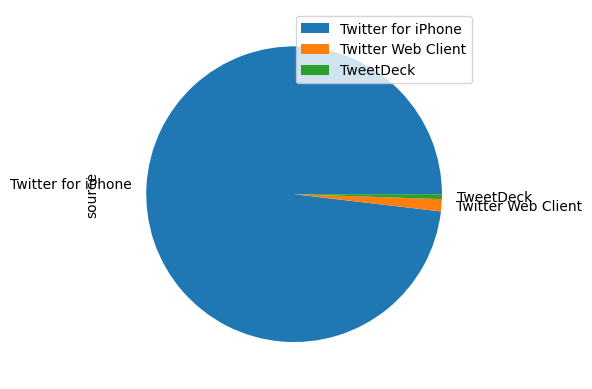

In [93]:
master_data.source.value_counts().plot(kind='pie', legend=True)

Majority of our tweets are coming from Twitter app on iPhones.

### Insight 5: What is the correlation between Retweet and Likes?

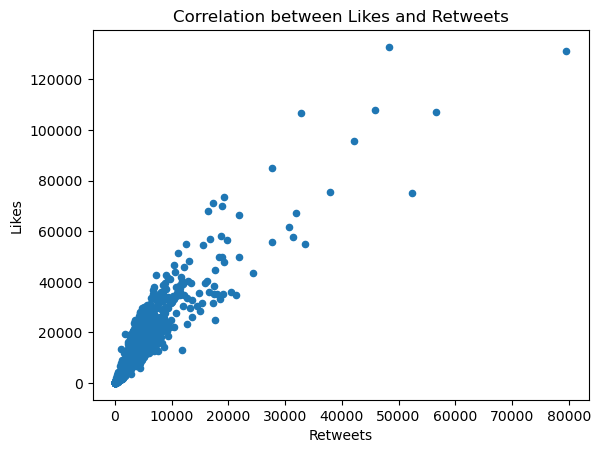

In [99]:
master_data.plot(
    kind='scatter',
    x='retweet_count',
    y='favorite_count',
    xlabel='Retweets',
    ylabel='Likes',
    title='Correlation between Likes and Retweets');